<a href="https://colab.research.google.com/github/atharva07-tech/First-Machine-Learning-Project/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

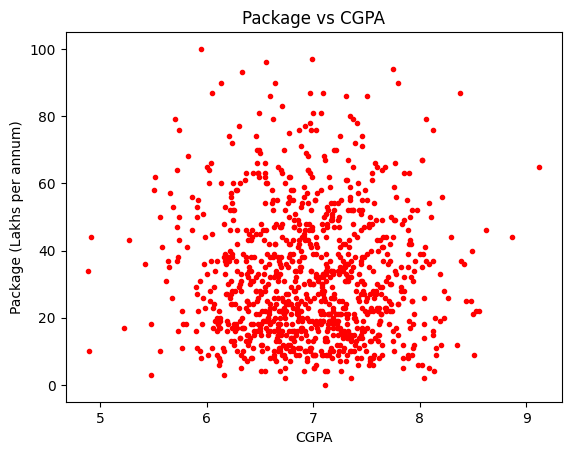

In [18]:
# Import necessary libraries
# NumPy is used for numerical operations
# Pandas is used for data handling and analysis
# Matplotlib is used for data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv("placement.csv")

# Extract feature (CGPA) and target (Placement Package)
x_train = df.cgpa
y_train = df.placement_exam_marks

# Create a scatter plot to visualize the relationship
# between CGPA and placement package
plt.scatter(x_train, y_train, c='r', marker='.')

# Label the x-axis and y-axis
plt.xlabel("CGPA")
plt.ylabel("Package (Lakhs per annum)")

# Add a title to the plot
plt.title("Package vs CGPA")

# Display the plot
plt.show()


In [19]:
# Function to compute the cost (Mean Squared Error)
# x : input feature values
# y : actual target values
# w : weight (slope)
# b : bias (intercept)
def comp_cost(x, y, w, b):
    m = len(x)                      # Number of training examples
    y_pred = w * x + b              # Predicted output
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)  # MSE cost function
    return cost


# Function to compute gradients of cost function
# dw : partial derivative of cost w.r.t weight
# db : partial derivative of cost w.r.t bias
def comp_grad(x, y, w, b):
    m = len(x)                      # Number of training examples
    y_pred = w * x + b              # Predicted output

    # Compute gradients
    dw = (1 / m) * np.sum((y_pred - y) * x)
    db = (1 / m) * np.sum(y_pred - y)

    return dw, db


# Function to perform Gradient Descent
# alpha : learning rate
# iter  : number of iterations
def grad_desc(x, y, w, b, alpha, iter):
    for i in range(iter):
        # Calculate gradients
        dw, db = comp_grad(x, y, w, b)

        # Update parameters in the direction of minimum cost
        w = w - alpha * dw
        b = b - alpha * db

    # Return optimized parameters
    return w, b


In [20]:
# Initialize model parameters
# w : weight (slope)
# b : bias (intercept)
w = 0
b = 0

# Set learning rate and number of iterations
alp = 0.001            # Learning rate controls step size
iterations = 25000     # Number of gradient descent iterations

# Train the model using Gradient Descent
w, b = grad_desc(x_train, y_train, w, b, alp, iterations)

# Compute final cost after training
final_cost = comp_cost(x_train, y_train, w, b)

# Take CGPA input from the user
pred = float(input("Enter CGPA (out of 10): "))

# Validate CGPA input
if pred > 10 or pred < 0:
    print("Invalid CGPA.")
    exit()
else:
    # Predict placement package using learned parameters
    sal = w * pred + b

# Display the predicted salary
print(f"Predicted placement package: {sal} LPA")



Enter CGPA (out of 10): 5.5
Predicted placement package: 26.771848148713993 LPA
